# Red Wine Draft 6

# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import datetime
import sqlite3
import imblearn


from IPython.display import display
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Load Raw Data

In [2]:
redwine = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\RedWine\\DataSets\\winequality-red.csv",
    index_col=False,
)

In [3]:
# redwine['quality'] = redwine['quality'].replace([8], 1)
# redwine['quality'] = redwine['quality'].replace([3, 4, 5, 6, 7], 0)

In [4]:
redwine['quality'] = redwine['quality'].replace([7, 8], 1)
redwine['quality'] = redwine['quality'].replace([3, 4, 5, 6], 0)

In [5]:
# # Load libraries
# import pandas as pd
# from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# from sklearn.model_selection import train_test_split # Import train_test_split function
# from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# feature_cols = [
#     "citric acid",
#     "residual sugar",
#     "free sulfur dioxide",
#     "total sulfur dioxide",
#     "density",
#     "sulphates",
#     "alcohol",
# ]

# X = redwine[feature_cols]
# y = redwine.quality

In [6]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

feature_cols = [
    "citric acid",
    "volatile acidity",
    "residual sugar",
    "total sulfur dioxide",
    "sulphates",
    "alcohol",
]

X = redwine[feature_cols]
y = redwine.quality

In [7]:
oversample = RandomOverSampler(sampling_strategy='minority')
oversample = RandomOverSampler(sampling_strategy='auto')
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
X, y = oversample.fit_resample(X, y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7987951807228916


In [10]:
confusion_matrix(y_test, y_pred)

array([[303, 100],
       [ 67, 360]], dtype=int64)

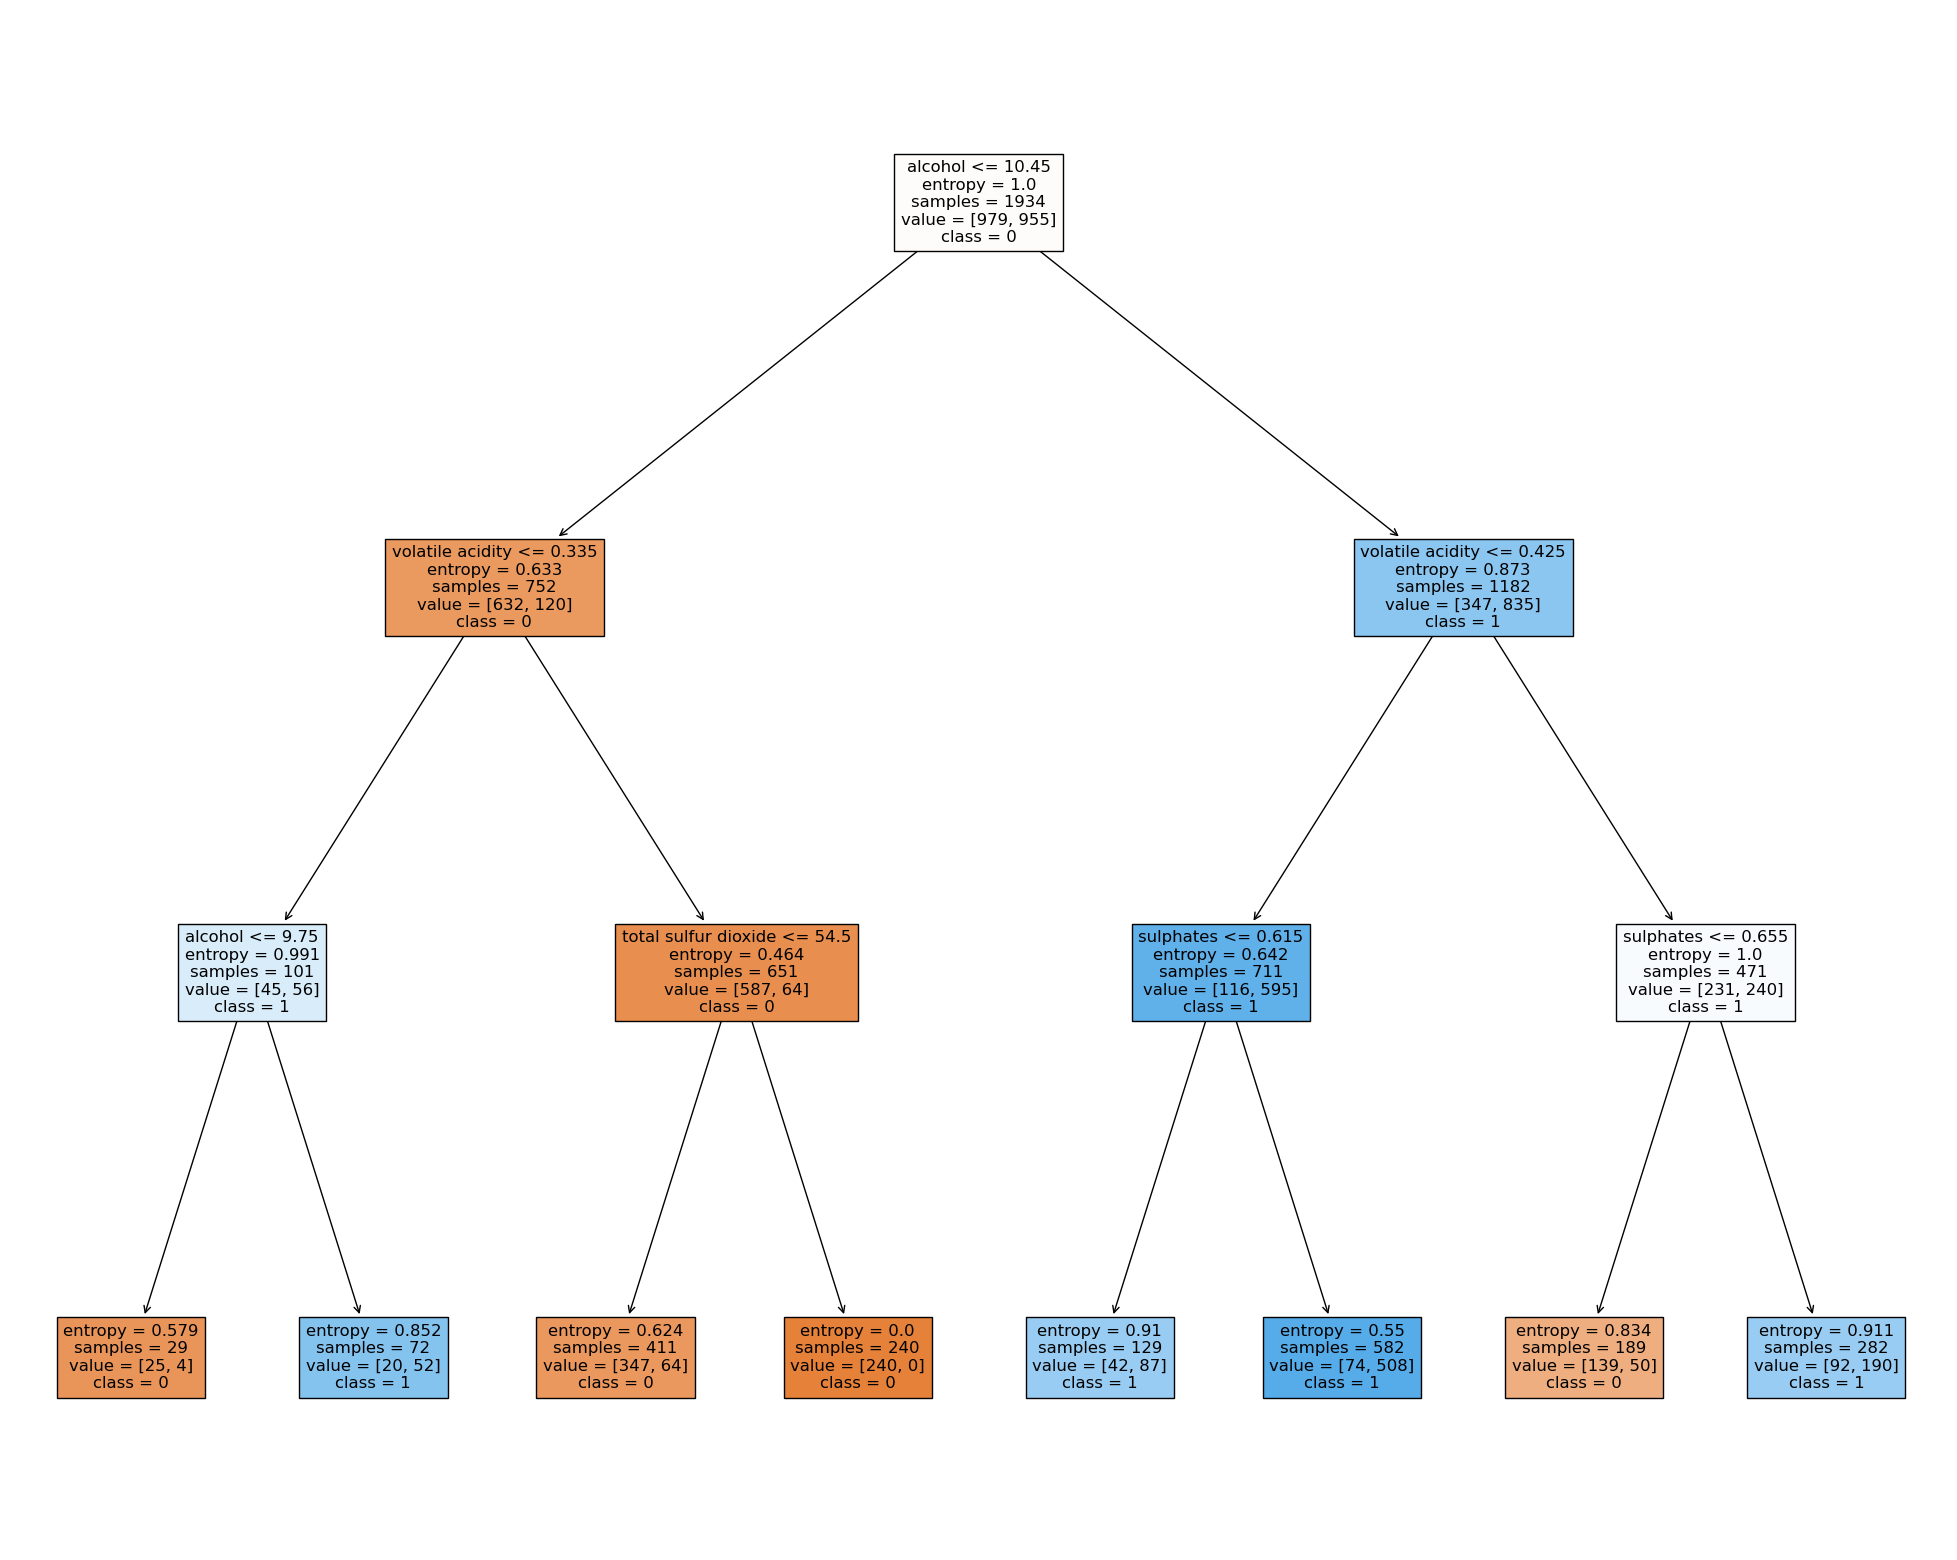

In [11]:
cn = ['0', '1']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=cn,
                   filled=True)
